In [1]:
#pip install ipympl
#!pip install pandas 
#!pip install numpy
#!pip install matplotlib
#!pip install ipympl

In [1]:
# creating 3d bar plot using matplotlib 
# in python

# to interact  with plot
%matplotlib widget

# importing required libraries
import os
import csv
from pathlib import Path
import pandas as pd
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['axes3d.mouserotationstyle'] = 'azel' #'trackball'

hole_indexes = ['2-5', '2-6', '3-2', '3-3', '4-5']
filenames = [idx + " - Borehole Deviation Data.csv" for idx in hole_indexes]

#source_folder = Path(r'C:\Users\howar\OneDrive - ballingercloud\Documents\umb boreholes')
source_folder = Path(r'C:\Users\DHoward\OneDrive - ballingercloud\Documents\umb boreholes')
filepaths = [source_folder / fn for fn in filenames]

def plot_borehole_3d(filepath):

    df = pd.read_csv(filepath)
    df.dropna(inplace=True)
    df = df.set_axis(['idx', 'dz', 'dy', 'dx', 'total_dev_ft', 'total_dev_pct'], axis=1)
    df = df[0::10] # only getting entries every 10 linear feet, could remove for every 1 foot spacing
    df['dz'] = -df['dz']

    df['delta_dx'] = df['dx'] - df['dx'].shift(1, fill_value=None)
    df['delta_dy'] = df['dy'] - df['dy'].shift(1, fill_value=None)
    df['delta_dz'] = df['dz'] - df['dz'].shift(1, fill_value=None)

    # to get the change in direction, need to get the difference between this delta and previous delta

    df['ddx'] = df['delta_dx'] - df['delta_dx'].shift(1, fill_value=None)
    df['ddy'] = df['delta_dy'] - df['delta_dy'].shift(1, fill_value=None)
    df['ddz'] = df['delta_dz'] - df['delta_dz'].shift(1, fill_value=None)

    df.loc[df['ddx'].abs() < 0.001, 'ddx'] = 0
    df.loc[df['ddy'].abs() < 0.001, 'ddy'] = 0
    df.loc[df['ddz'].abs() < 0.001, 'ddz'] = 0

    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot(df['dx'], df['dy'], df['dz'], label='test borehole plot')
    plt.show()

    #ax = Axes3D(fig)
    #ax.plot(df['dx'], df['dy'], df['dz'], label='test borehole plot')
    #plt.show()
    
def plot_multiples(pathlist, names):
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    start_x = 0
    start_y = 0
    
    for filepath, name in zip(pathlist, names):
        df = pd.read_csv(filepath)
        df.dropna(inplace=True)
        df = df.set_axis(['idx', 'dz', 'dy', 'dx', 'total_dev_ft', 'total_dev_pct'], axis=1)
        df = df[0::10] # only getting entries every 10 linear feet, could remove for every 1 foot spacing
        df['dx'] = df['dx'] + start_x
        df['dy'] = df['dy'] + start_y
        df['dz'] = -df['dz']

        df['delta_dx'] = df['dx'] - df['dx'].shift(1, fill_value=None)
        df['delta_dy'] = df['dy'] - df['dy'].shift(1, fill_value=None)
        df['delta_dz'] = df['dz'] - df['dz'].shift(1, fill_value=None)

        # to get the change in direction, need to get the difference between this delta and previous delta

        df['ddx'] = df['delta_dx'] - df['delta_dx'].shift(1, fill_value=None)
        df['ddy'] = df['delta_dy'] - df['delta_dy'].shift(1, fill_value=None)
        df['ddz'] = df['delta_dz'] - df['delta_dz'].shift(1, fill_value=None)

        df.loc[df['ddx'].abs() < 0.001, 'ddx'] = 0
        df.loc[df['ddy'].abs() < 0.001, 'ddy'] = 0
        df.loc[df['ddz'].abs() < 0.001, 'ddz'] = 0
        
        ax.plot(df['dx'], df['dy'], df['dz'], label=name)
        start_x += 20
        start_y += 20
        
    plt.show()
    


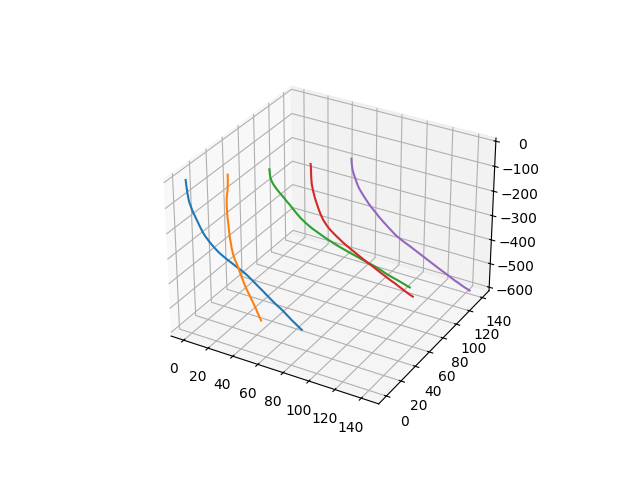

In [2]:
plot_multiples(filepaths, filenames)

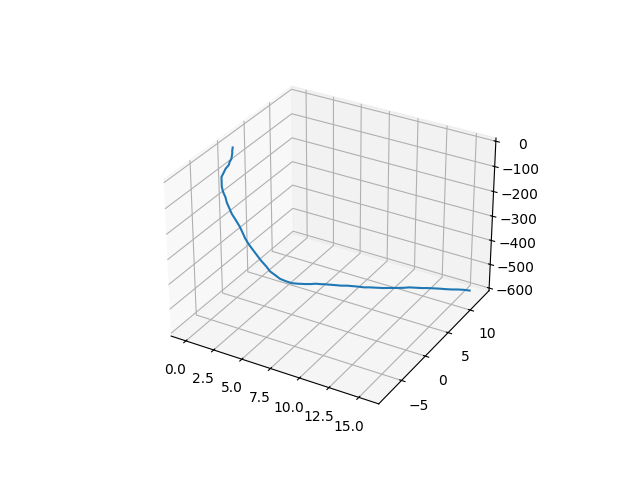

In [4]:
plot_borehole_3d(filepaths[1])

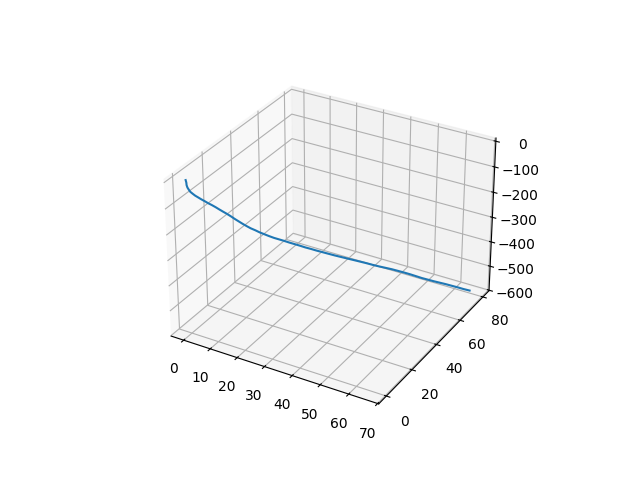

In [5]:
plot_borehole_3d(filepaths[2])

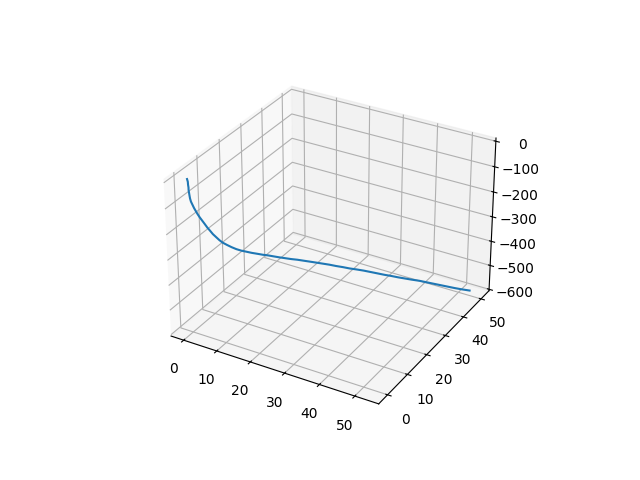

In [6]:
plot_borehole_3d(filepaths[3])

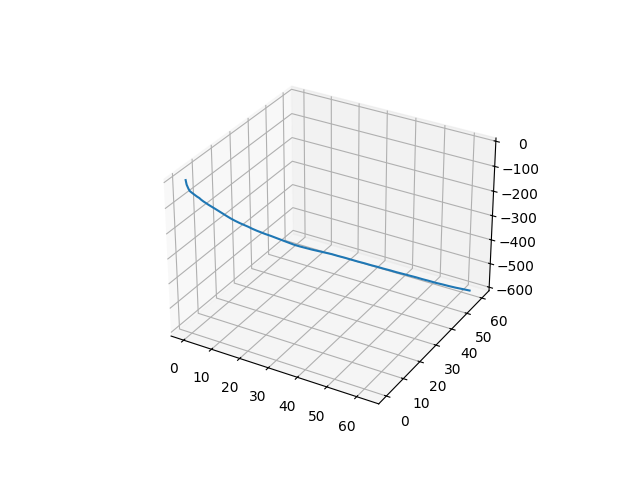

In [7]:
plot_borehole_3d(filepaths[4])